In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#1. Abrir el conjunto de datos Enfermedad Cardiovascular con ayuda de la librería Pandas utilizando un 
# cuaderno nuevo de Python. 

df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# 2. Preparar los datos utilizando las variables Dummy para representar las columnas que tengan variables donde 
# existan dos o más categorías diferentes. Recuerda, para que sea posible trabajar con los modelos 
# todas las variables deben de ser numéricas.

df_w_dummy = pd.get_dummies(df, columns=['gender','cholesterol','gluc','smoke','alco','active'], drop_first=True)

In [4]:
df_w_dummy = df_w_dummy.drop('id',axis=1)
df_w_dummy.head()

,age,height,weight,ap_hi,ap_lo,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,18393,168,62.0,110,80,0,1,0,0,0,0,0,0,1
1,20228,156,85.0,140,90,1,0,0,1,0,0,0,0,1
2,18857,165,64.0,130,70,1,0,0,1,0,0,0,0,0
3,17623,169,82.0,150,100,1,1,0,0,0,0,0,0,1
4,17474,156,56.0,100,60,0,0,0,0,0,0,0,0,0


In [5]:
# Veo los registros 
df_w_dummy.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [7]:
# Undersampling
df_no = df_w_dummy[df_w_dummy['cardio'] == 0]
df_yes = df_w_dummy[df_w_dummy['cardio'] == 1]
df_no_reduced = df_no.sample(df_yes.shape[0],random_state=103)
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced.head()

,age,height,weight,ap_hi,ap_lo,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
22105,16712,163,67.0,110,80,1,1,0,0,0,0,0,0,0
25111,16801,151,52.0,180,90,0,0,1,0,1,0,0,0,0
21491,15304,157,55.0,120,80,0,0,0,0,0,0,0,0,1
65034,20476,155,100.0,160,80,1,0,0,0,1,0,0,0,0
55288,20427,164,72.0,130,90,0,1,1,0,0,0,0,0,1


In [8]:
# Verifico
df_reduced.cardio.value_counts()

1    34979
0    34979
Name: cardio, dtype: int64

In [9]:
X = df_reduced.drop('cardio',axis=1)
y = df_reduced.cardio

# Hago el scaling de datos
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [10]:
# split de datos para entrenamiento como siempre
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=103)

In [11]:
# 3. Identificar, dentro del nuevo conjunto de datos, cuáles son las características más relevantes que impactan
# más en el resultado. Debes utilizar la librería “sklearn.feature_selection” para realizar este paso.

estimator = LogisticRegression(solver='lbfgs',max_iter=150)
selector = RFE(estimator, 7, step=1)
selector = selector.fit(X_train, y_train.ravel())

print("Variables relevantes: ")
print(selector.support_,"\n")

Variables relevantes: 
[ True  True  True  True  True False  True  True False False False False
 False] 



In [12]:
# 4 - Imprimimos el ranking de las variables mas importantes
print("Ranking VR: ")
print(selector.ranking_,"\n")

Ranking VR: 
[1 1 1 1 1 6 1 1 7 2 5 4 3] 



In [19]:
# 4. Utilizando la instrucción “print”, mostrar el ranking de cuales son las variables más importantes
# identificadas en el punto anterior. Posteriormente analizar los resultados y escribir tus conclusiones del por
# qué estas variables impactan más que otras.
best_variables = selector.support_
df_reduced_best = df_reduced.drop("cardio",axis=1)
print("Dataframe VR:")
print(df_reduced_best.loc[:, best_variables].head(),"\n")

Dataframe VR:
         age  height  weight  ap_hi  ap_lo  cholesterol_2  cholesterol_3
22105  16712     163    67.0    110     80              0              0
25111  16801     151    52.0    180     90              1              0
21491  15304     157    55.0    120     80              0              0
65034  20476     155   100.0    160     80              0              0
55288  20427     164    72.0    130     90              1              0 



In [14]:
list_col=['age', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol_2','cholesterol_3']

In [15]:
X = df_reduced[list_col]
y = df_reduced['cardio']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=103)

In [17]:
# 5. Crear un modelo de regresión logística que represente a nuestro conjunto de datos.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',max_iter=150).fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Precision: ",accuracy_score(y_test,y_test_hat),"\n")
print("Report: ")
print(classification_report(y_test,y_test_hat),"\n")

Precision:  0.7042491445402175 

Report: 
              precision    recall  f1-score   support

           0       0.68      0.76      0.72     11507
           1       0.73      0.65      0.69     11580

    accuracy                           0.70     23087
   macro avg       0.71      0.70      0.70     23087
weighted avg       0.71      0.70      0.70     23087
 



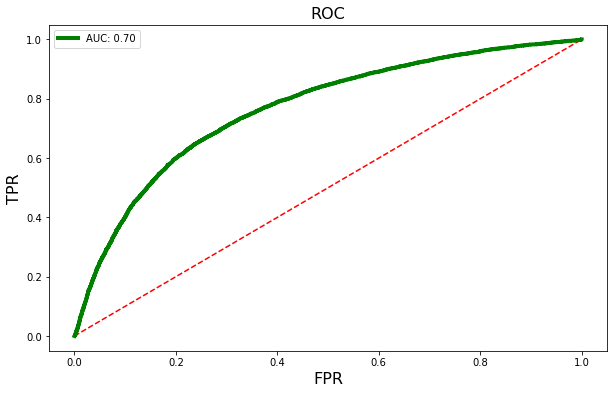

In [21]:
# 6. Evaluar el modelo usando una curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = clf.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();
plt.savefig("cardio_ROC.jpg")

In [22]:
# 7. Evaluar el modelo usando una curva CAP.

df_cap = df_w_dummy.sample(1000,random_state=20)
cap_X = df_cap[list_col]
df_cap.cardio.value_counts()

1    503
0    497
Name: cardio, dtype: int64

361


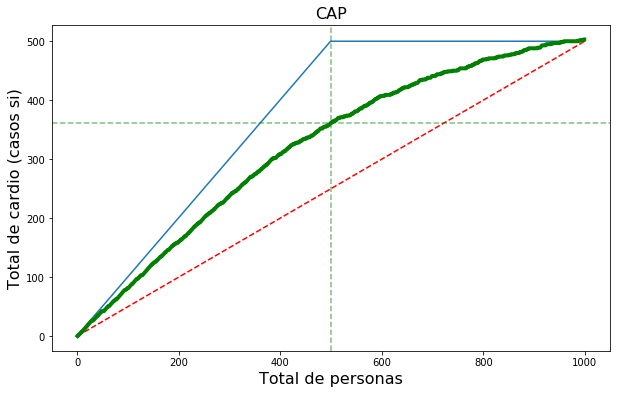

In [23]:
plt.figure(figsize = (10, 6))
plt.plot([0,1000], [0,500], 'r--');

perfect_model = np.cumsum(np.repeat(1,500))
perfect_model.resize(1000)
perfect_model[500:] = 500
perfect_model
plt.plot(perfect_model);

df_cap['probs'] = clf.predict_proba(cap_X)[:, 1]
df_cap = df_cap.sort_values(by='probs',ascending=False)
probs = np.cumsum(df_cap.cardio).values
plt.plot(probs,c = 'g', label = label, linewidth = 4);

plt.xlabel('Total de personas', fontsize = 16)
plt.ylabel('Total de cardio (casos si)', fontsize = 16)
plt.title('CAP', fontsize = 16)

plt.axvline(x=500, color='g', linestyle='--',alpha=0.5)
plt.axhline(y=probs[499], color='g', linestyle='--',alpha=0.5)

plt.savefig("cardio_CAP.jpg")

print(probs[499])